In [198]:
import pandas as pd
import numpy as np

Первый итоговый файл part1.csv должен содержать:

id топ-10 самых дорогих квартир

список индексов самых дорогих квартир за каждый месяц 

id топ-5 самых больших квартир 

количество строк с пропусками в life_sq

два коэффициента корреляции Пирсона

Каждый пункт в итоговом файле должен быть на новой строке. 

Если пункт содержит несколько значений, следует записать их через запятую.

In [199]:
# считаем данные в соответствующие датафреймы

train_main_df = pd.read_csv('HW_train_main_data.csv')

In [200]:
train_main_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0


## 1. Найти id топ-10 самых дорогих квартир из датасета.

In [201]:
top_id_expen_df = train_main_df[['id', 'price']].sort_values(by='price', ascending=False).head(10)

In [202]:
top_id_expen_df.head()

,id,price
18117,85073,112444400.0
27095,14154,95255100.0
5829,88100,94932200.0
26225,78059,87549200.0
15217,91175,81827500.0


In [203]:
top_id_expen = [x for x in top_id_expen_df.id]

In [204]:
top_id_expen

[85073, 14154, 88100, 78059, 91175, 45584, 95572, 63901, 92747, 40136]

## 2. Построить зависимость средней стоимости квартиры от года и месяца продаж. В результате необходимо получить график, где по оси oY расположена средняя стоимость квартиры, а по оси oX — временная отметка в виде сочетания месяца и года.

In [205]:
train_main_df['timestamp'] = pd.to_datetime(train_main_df['timestamp'])

In [206]:
df = train_main_df[['timestamp', 'price']]

In [207]:
df = df.set_index('timestamp').resample("M").mean()

In [208]:
# импортируем библиотеки для визуализаци данных

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

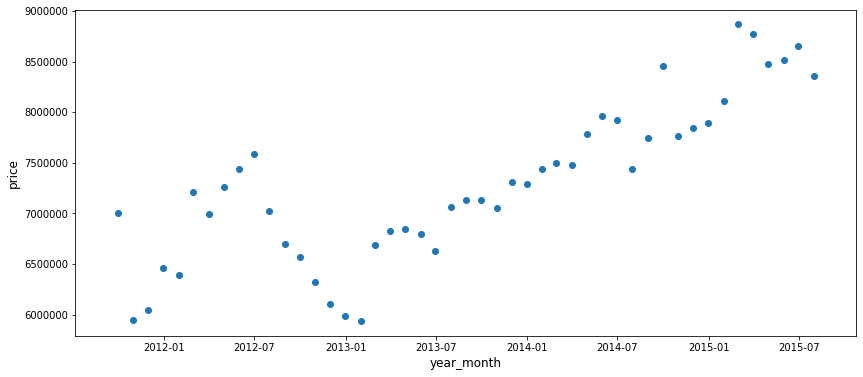

In [209]:
# нарисуем график зависимости средней цены от месяца и года 

plt.figure(figsize=(14, 6))
plt.scatter(df.index, df.price)
plt.xlabel('year_month', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

## 3. для каждой пары месяц-год найти индексы (не id) самых дорогих квартир.

In [210]:
# get year
train_main_df['year'] = train_main_df.timestamp.dt.year
# get month of year
train_main_df['month'] = train_main_df.timestamp.dt.month
train_main_df['year_month'] = train_main_df['year'].astype(str) + '_' + train_main_df['month'].astype(str)

In [211]:
df_ym = train_main_df.groupby(['year_month'])['price'].max().reset_index()

In [214]:
expensive_month = []
for i, k in zip(df_ym.year_month, df_ym.price):
    for t in range(len(train_main_df)):
        if (train_main_df['price'].iloc[t] == k) & (train_main_df['year_month'].iloc[t] == i):
            expensive_month.append(t)
        else:
            pass

In [215]:
expensive_month

[28566,
 24188,
 27279,
 22408,
 20316,
 16898,
 28806,
 7537,
 27461,
 8417,
 26644,
 18117,
 10035,
 26274,
 26321,
 9030,
 15912,
 10213,
 8788,
 20082,
 3163,
 26225,
 3767,
 27095,
 14807,
 24097,
 20799,
 20649,
 6981,
 25278,
 13329,
 2526,
 1740,
 7055,
 12729,
 5582,
 15217,
 18599,
 5942,
 28868,
 9340,
 14321,
 5829,
 6705,
 7755,
 12483,
 2014]

## 4. Построить boxplot для цены для пар месяц-год.

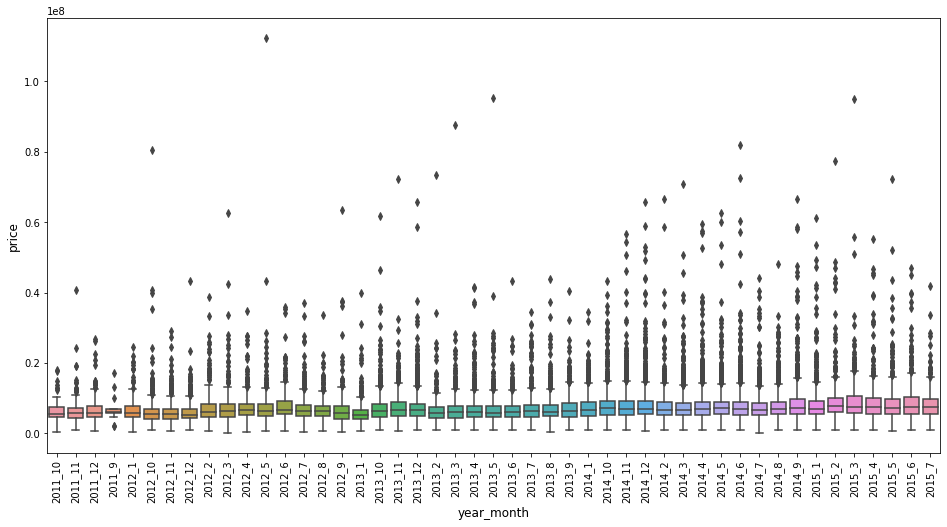

In [216]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='year_month', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('year_month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## 5. Найти id топ-5 самых больших квартир.

In [217]:
df_top_id_large_df = train_main_df[['id','full_sq']].sort_values(by='full_sq', ascending=False).head(5)

In [218]:
df_top_id_large = [x for x in df_top_id_large_df.id]

## 6. Пропуски в life_sq

Посчитать количество пропусков в life_sq.  
Заполнить пропуски в life_sq предложенным вами способом. 

In [176]:
life_sq_null  = train_main_df.life_sq.isnull().sum()
life_sq_null 

6065

In [177]:
# оценим интервалы распределения по жилой площади 

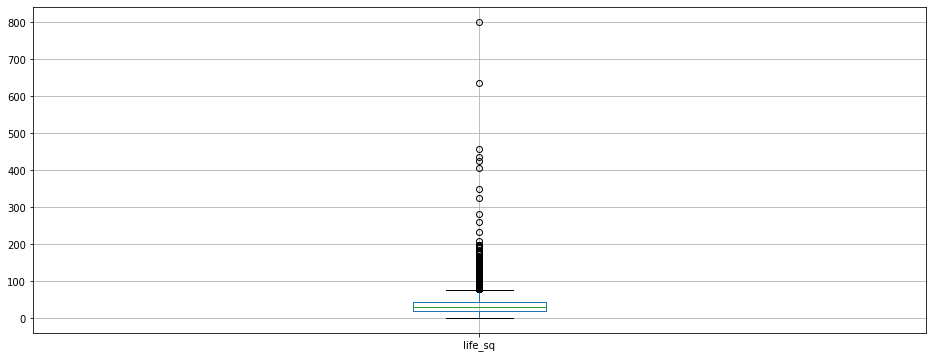

In [178]:
train_main_df.boxplot(column=['life_sq'], figsize= (16, 6))

In [179]:
# возьмем среднее значение площади в пределах 200 км м 

In [180]:
mean_lf = train_main_df['life_sq'].loc[train_main_df['life_sq']<200].mean()

In [181]:
train_main_df['life_sq'] = train_main_df['life_sq'].fillna(value = mean_lf)

In [182]:
train_main_df.isnull().sum()

id                         0
timestamp                  0
full_sq                    0
life_sq                    0
floor                    157
max_floor               9113
material                9113
build_year             12941
num_room                9113
kitch_sq                9113
apartment condition    12912
sub_area                   0
price                      0
year                       0
month                      0
year_month                 0
dtype: int64

## 7. Сохранить коэффициенты корреляции Пирсона между (price, full_sq) и (price, life_sq без пропусков). 

In [219]:
correlation_p_full_sq = train_main_df.price.corr(train_main_df.full_sq)

In [220]:
correlation_p_full_sq 

0.33711308742057905

In [221]:
correlation_p_life_sq = train_main_df.price.corr(train_main_df.life_sq)

In [223]:
correlation_p_life_sq

0.4152906993761454

In [272]:
corr_list= [str(correlation_p_full_sq), str(correlation_p_life_sq)]

In [273]:
corr_list

['0.33711308742057905', '0.4152906993761454']

In [274]:
## Записываем данные в csv 

In [277]:
with open('part1.csv', mode='w+', newline="") as file:
    t = csv.writer(file, delimiter=',', quoting=csv.QUOTE_NONE)
    t.writerow(top_id_expen)
    t.writerow(expensive_month)
    t.writerow(df_top_id_large)
    file.write(str(life_sq_null) + "\n")
    t.writerow(corr_list)